# Linear Regression using single variable

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

![](download.png)

In [2]:
df=pd.read_csv('homeprices.csv')

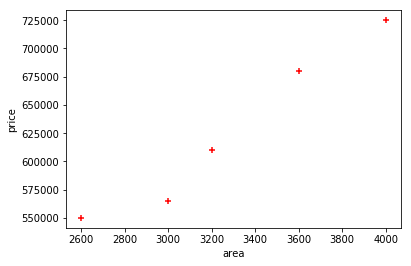

In [16]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(y=df.price,x=df.area,marker='+',color='red')

In [17]:
reg=linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
type(df.price)

pandas.core.series.Series

In [10]:
type(df[['price']])

pandas.core.frame.DataFrame

In [11]:
type(df['price'])

pandas.core.series.Series

In [12]:
df.area

0    2600
1    3000
2    3200
3    3600
4    4000
Name: area, dtype: int64

In [13]:
df['area']

0    2600
1    3000
2    3200
3    3600
4    4000
Name: area, dtype: int64

In [14]:
df[['area']]

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [69]:
reg.predict([[3000]])

array([587979.45205479])

In [68]:
reg.intercept_+3000*reg.coef_

array([587979.45205479])

In [20]:
dir(reg)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [21]:
reg.intercept_

180616.43835616432

In [24]:
reg.rank_

1

In [25]:
reg.singular_

array([1080.74048689])

***y = mx+c***
where: 
- c => reg.intercept_
- m => reg.coef_

In [26]:
reg.coef_

array([135.78767123])

In [39]:
df[['area']].to_csv('area.csv',index=False)

In [40]:
d=pd.read_csv('area.csv')

In [42]:
d

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [44]:
d['predicted_price']=reg.predict(d)

In [45]:
d

,area,predicted_price
0,2600,533664.383562
1,3000,587979.452055
2,3200,615136.986301
3,3600,669452.054795
4,4000,723767.123288


In [47]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


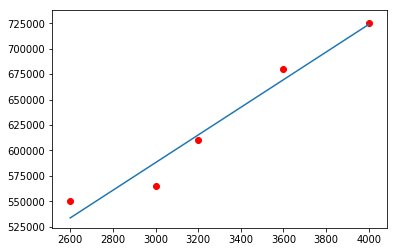

In [55]:
plt.plot(df.area,d.predicted_price)
plt.scatter(df.area,df.price,color='red')
plt.show()

# Linear Regression using multiple varible

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [5]:
df=pd.read_csv('canada_per_capita_income.csv')

In [6]:
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681
